In [6]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
path = kagglehub.dataset_download("milapgohil/play-tennis-dataset-weather-based-classifier")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'play-tennis-dataset-weather-based-classifier' dataset.
Path to dataset files: /kaggle/input/play-tennis-dataset-weather-based-classifier


In [8]:
data = pd.read_csv("/kaggle/input/play-tennis-dataset-weather-based-classifier/play_tennis_dataset.csv")
df = pd.DataFrame(data)


In [9]:
df.head(25)

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Overcast,Mild,Normal,Strong,Yes
1,D2,Sunny,Mild,Normal,Strong,Yes
2,D3,NaN,Mild,High,Strong,No
3,D4,Sunny,Mild,High,Weak,Yes
4,D5,Sunny,Cool,Normal,Strong,Yes
5,D6,NaN,Cool,Normal,Strong,Yes
6,D7,Sunny,Mild,High,Weak,Yes
7,D8,Sunny,Mild,Normal,Weak,Yes
8,D9,Rainy,Mild,Normal,Weak,No
9,D10,Rainy,Cool,High,Weak,No


In [10]:
df.shape

(6666, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          6666 non-null   object
 1   Outlook      6267 non-null   object
 2   Temperature  6333 non-null   object
 3   Humidity     6433 non-null   object
 4   Wind         6300 non-null   object
 5   Play         6666 non-null   object
dtypes: object(6)
memory usage: 312.6+ KB


In [12]:
df.describe()

,Day,Outlook,Temperature,Humidity,Wind,Play
count,6666,6267,6333,6433,6300,6666
unique,31,3,3,2,2,2
top,D1,Overcast,Cool,Normal,Weak,Yes
freq,220,2192,2538,3872,4473,4080


In [13]:
df.isnull().sum()

,0
Day,0
Outlook,399
Temperature,333
Humidity,233
Wind,366
Play,0


In [14]:
df.columns = df.columns.str.lower().str.strip()

In [15]:
df.isnull().sum()

,0
day,0
outlook,399
temperature,333
humidity,233
wind,366
play,0


In [16]:
for col in ['outlook', 'temperature', 'humidity', 'wind', 'play']:
  df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
df.isnull().sum()

,0
day,0
outlook,0
temperature,0
humidity,0
wind,0
play,0


In [18]:
df[df.duplicated(subset=['outlook','temperature','humidity','wind','play'])]

,day,outlook,temperature,humidity,wind,play
6,D7,Sunny,Mild,High,Weak,Yes
10,D11,Rainy,Mild,Normal,Weak,No
11,D12,Sunny,Mild,Normal,Weak,Yes
14,D15,Sunny,Mild,High,Weak,Yes
21,D22,Overcast,Mild,High,Weak,Yes
...,...,...,...,...,...,...
6661,D28,Sunny,Mild,High,Weak,Yes
6662,D29,Rainy,Cool,High,Weak,No
6663,D30,Overcast,Cool,High,Weak,Yes
6664,D31,Sunny,Hot,High,Strong,No


In [19]:
df[df['day'].duplicated(keep=False)]

,day,outlook,temperature,humidity,wind,play
0,D1,Overcast,Mild,Normal,Strong,Yes
1,D2,Sunny,Mild,Normal,Strong,Yes
2,D3,Overcast,Mild,High,Strong,No
3,D4,Sunny,Mild,High,Weak,Yes
4,D5,Sunny,Cool,Normal,Strong,Yes
...,...,...,...,...,...,...
6661,D28,Sunny,Mild,High,Weak,Yes
6662,D29,Rainy,Cool,High,Weak,No
6663,D30,Overcast,Cool,High,Weak,Yes
6664,D31,Sunny,Hot,High,Strong,No


In [20]:
df = df.drop(columns=['day'])

In [21]:
df.duplicated().sum()

np.int64(6607)

# **Creating a copy of df as df1**

In [22]:
df1 = df.copy()

In [23]:
df1 = df1.drop_duplicates()

In [24]:
df1.shape

(59, 5)

In [25]:
df1['play'].value_counts()

,count
play,
No,36
Yes,23


# **Splitting the data into variables and target (For dataset without duplicate values).**

In [26]:
x = df1.drop('play', axis=1)
y = df1['play']

x = pd.get_dummies(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [28]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
tree.score(x_test, y_test)

0.3333333333333333

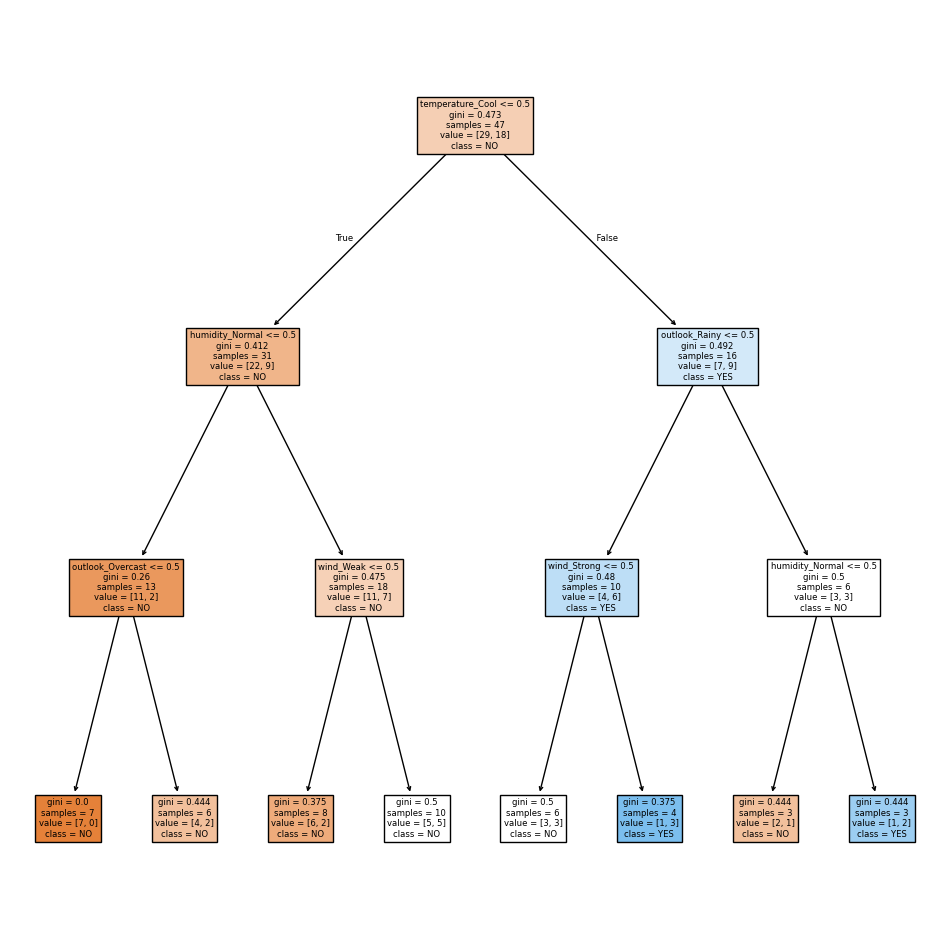

In [30]:
plt.figure(figsize=(12,12))
plot_tree(tree, feature_names=x.columns, class_names=['NO', 'YES'], filled=True)
plt.show()

# **Splitting the data into variables and target (For dataset with duplicate values).**

In [31]:
x1 = df.drop('play', axis=1)
y1 = df['play']

x1 = pd.get_dummies(x1)

In [32]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    x1, y1, test_size=0.2, random_state=42
)

In [33]:
tree1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree1.fit(x_train_1, y_train_1)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
tree1.score(x_test_1, y_test_1)

0.8013493253373314

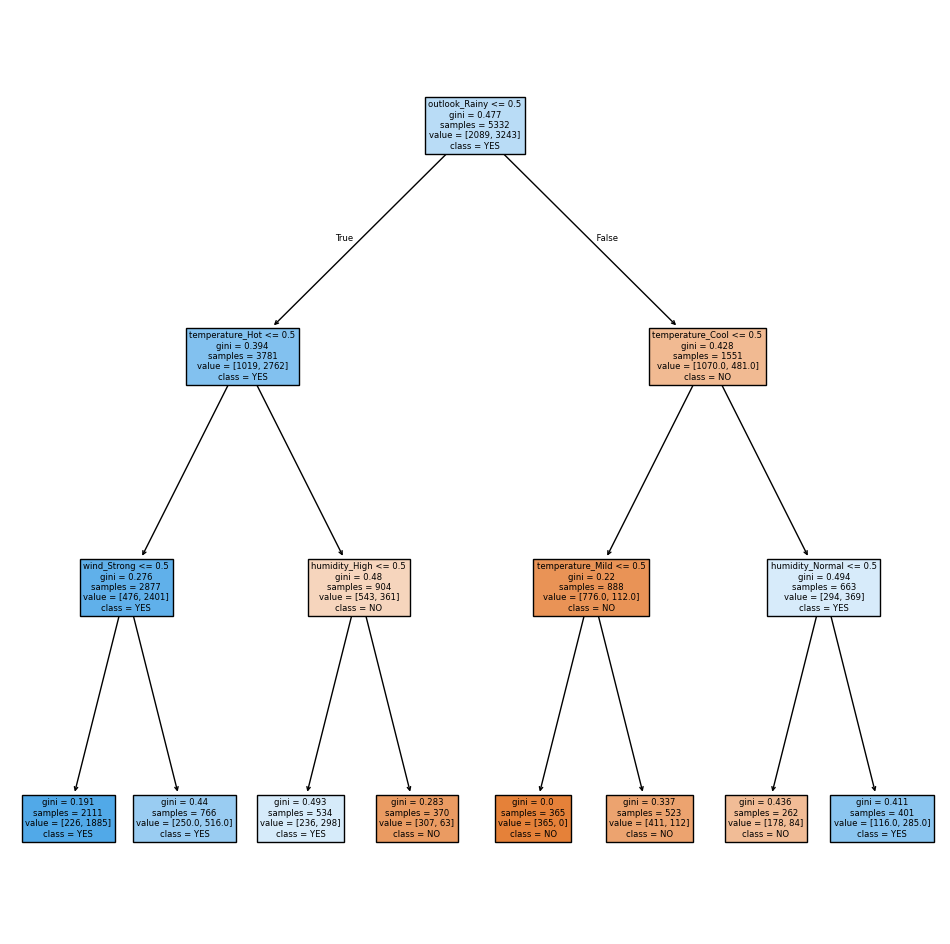

In [35]:
plt.figure(figsize=(12,12))
plot_tree(tree1, feature_names=x1.columns, class_names=['NO', 'YES'], filled=True)
plt.show()